In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px

from scipy.stats import shapiro
from scipy.stats import zscore
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score,\
    recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.calibration import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/un-global-water-data-2012-2022/water.csv


In [2]:
df = pd.read_csv("/kaggle/input/un-global-water-data-2012-2022/water.csv")
df.head()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2012,30.777313,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2013,28.224066,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2014,25.679155,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2015,23.142490,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2016,20.614330,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total


In [3]:
df.shape

(36519, 22)

In [4]:
df.isnull().sum()

DATAFLOW                                                                              0
REF_AREA:Geographic area                                                              0
INDICATOR:Indicator                                                                   0
SEX:Sex                                                                               0
TIME_PERIOD:Time period                                                               0
OBS_VALUE:Observation Value                                                           0
UNIT_MULTIPLIER:Unit multiplier                                                   36519
UNIT_MEASURE:Unit of measure                                                          0
OBS_STATUS:Observation Status                                                     36519
OBS_CONF:Observation confidentaility                                              36519
LOWER_BOUND:Lower Bound                                                           36519
UPPER_BOUND:Upper Bound         

In [5]:
df = df.dropna(axis=1, how='all')
df.head()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MEASURE:Unit of measure,DATA_SOURCE:Data Source,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2012,30.777313,PCNT: %,WHO/UNICEF Joint Monitoring Programme (2023),_T: Total
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2013,28.224066,PCNT: %,WHO/UNICEF Joint Monitoring Programme (2023),_T: Total
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2014,25.679155,PCNT: %,WHO/UNICEF Joint Monitoring Programme (2023),_T: Total
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2015,23.142490,PCNT: %,WHO/UNICEF Joint Monitoring Programme (2023),_T: Total
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2016,20.614330,PCNT: %,WHO/UNICEF Joint Monitoring Programme (2023),_T: Total


In [6]:
df = df.rename(columns={
    "REF_AREA:Geographic area":"REF_AREA",
    "INDICATOR:Indicator":"INDICATOR",
    "TIME_PERIOD:Time period":"TIME_PERIOD",
    "OBS_VALUE:Observation Value":"OBS_VALUE",
    "UNIT_MEASURE:Unit of measure":"UNIT_MEASURE",
    "DATA_SOURCE:Data Source":"DATA_SOURCE",
    "AGE:Current age":"AGE",
})

In [7]:
df.isnull().sum()

DATAFLOW        0
REF_AREA        0
INDICATOR       0
SEX:Sex         0
TIME_PERIOD     0
OBS_VALUE       0
UNIT_MEASURE    0
DATA_SOURCE     0
AGE             0
dtype: int64

In [8]:
df.describe()

,TIME_PERIOD,OBS_VALUE
count,36519.000000,36519.000000
mean,2016.848243,39.625292
std,3.091017,38.467088
min,2012.000000,0.000000
25%,2014.000000,2.294425
50%,2017.000000,26.165874
75%,2019.000000,80.827447
max,2022.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36519 entries, 0 to 36518
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATAFLOW      36519 non-null  object 
 1   REF_AREA      36519 non-null  object 
 2   INDICATOR     36519 non-null  object 
 3   SEX:Sex       36519 non-null  object 
 4   TIME_PERIOD   36519 non-null  int64  
 5   OBS_VALUE     36519 non-null  float64
 6   UNIT_MEASURE  36519 non-null  object 
 7   DATA_SOURCE   36519 non-null  object 
 8   AGE           36519 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.5+ MB


In [10]:
df.dtypes

DATAFLOW         object
REF_AREA         object
INDICATOR        object
SEX:Sex          object
TIME_PERIOD       int64
OBS_VALUE       float64
UNIT_MEASURE     object
DATA_SOURCE      object
AGE              object
dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


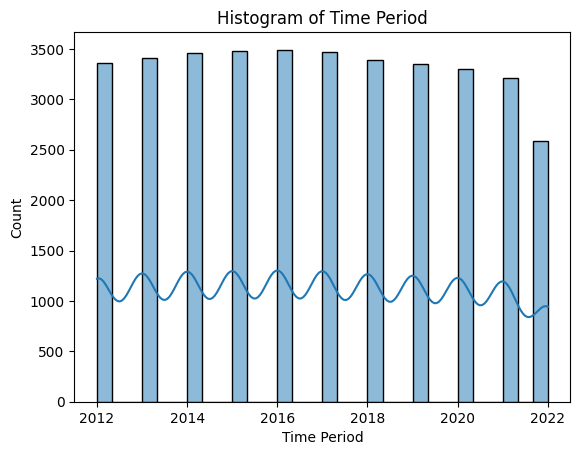

In [11]:
sns.histplot(data=df, x="TIME_PERIOD", bins=30, kde=True)
plt.xlabel("Time Period")
plt.ylabel("Count")
plt.title("Histogram of Time Period")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


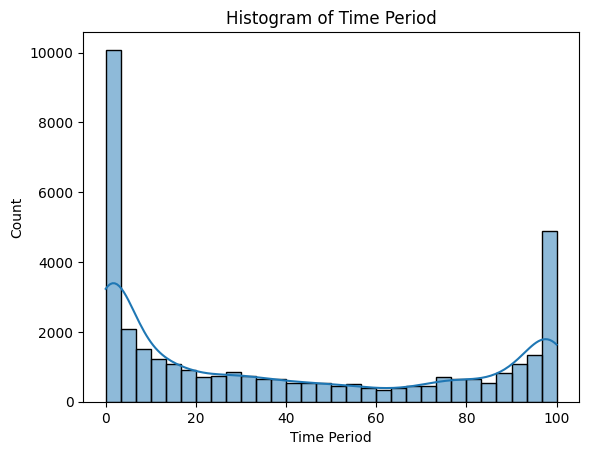

In [12]:
sns.histplot(data=df, x="OBS_VALUE", bins=30, kde=True)
plt.xlabel("Time Period")
plt.ylabel("Count")
plt.title("Histogram of Time Period")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


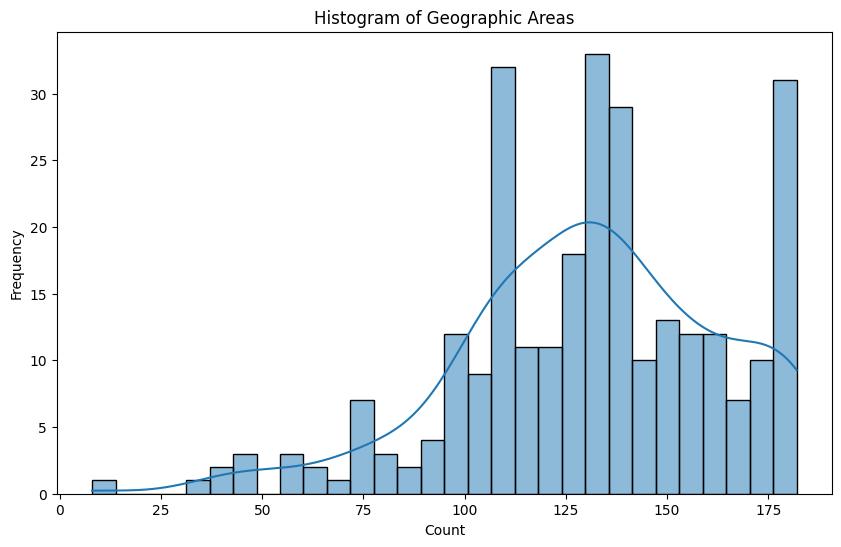

In [13]:
value_counts = df["REF_AREA"].value_counts()
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df, x=value_counts, bins=30, kde=True)
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Histogram of Geographic Areas")
plt.show()